# Cohort Welcome Offer

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cx_Oracle

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [4]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
df = pd.read_sql_query('''

 SELECT  
 	em.EM_ID,
 	to_date(em.EM_FECHA_ALTA) AS fecha_alta,
	to_date(min(ec_FECHA)) AS OrderDate,
--    ec.EC_CODIGO_PUBLICO AS OrderId,
    pro.PR_NOMBRE AS Product,
	ecd.ECD_PRECIO AS TotalCharges
from 
EMPLEO_ES.EMPRESAS_COMPRAS ec 
LEFT JOIN empleo_es.empresas_compras_detalles ecd ON ec.ec_id = ecd.ecd_compra
LEFT JOIN empleo_es.empresas_usuarios eu ON ec.EC_EMPRESA = eu.eu_id
LEFT JOIN empleo_Es.empresas_grupos eg ON eu.eu_grupo = eg.eg_id 
LEFT JOIN empleo_es.empresas_matrices em ON eg.eg_matriz = em.em_id
LEFT JOIN empleo_es.productos pro ON ecd.ECD_PRODUCTO = pro.pr_id
LEFT JOIN 
	(
		select num_compra, 
		to_date(fecha_imputacion, 'yyyymmdd') AS fecha_imputacion, 
		cod_canal_venta,
		sum(importe) importe
		from 
		DWHPRO.FACT_ENTERPRISE_SALES s
		LEFT JOIN DWHPRO.DIM_CANAL_VENTA dcv ON dcv.ID_CANAL_VENTA = s.id_canal_venta
		--where fecha_imputacion >= '20190101'
		group by num_compra, fecha_imputacion, cod_canal_venta
		having sum(importe) > 0
    )s ON TO_CHAR(ec.EC_CODIGO_PUBLICO) = s.NUM_COMPRA 
 WHERE 
 	to_date(em.EM_FECHA_ALTA) >= TO_DATE('20180101','YYYYMMDD') 
 	AND 
 	pro.PR_NOMBRE LIKE '%ferta%' 
 	AND ecd.ECD_PRECIO/ecd.ECD_CANTIDAD = 49
 	AND ec.EC_ESTADO = 1
 	AND ecd.ECD_PRECIO > 0
GROUP BY 
 	em.EM_ID,
 	to_date(em.EM_FECHA_ALTA),
  --  ec.EC_CODIGO_PUBLICO,
    pro.PR_NOMBRE,
	ecd.ECD_PRECIO

''', con)
df_save = df
df

,EM_ID,FECHA_ALTA,ORDERDATE,PRODUCT,TOTALCHARGES
0,33004492666,2018-03-08,2018-03-08,Oferta estandar,49
1,34253930842,2018-09-26,2018-09-26,Oferta estandar,49
2,34348734952,2018-10-09,2018-10-10,Oferta estandar,49
3,33502002042,2018-05-24,2018-05-25,Oferta estandar,49
4,34031647924,2018-08-26,2018-08-26,Oferta estandar,49
5,33144436028,2018-03-29,2018-03-29,Oferta estandar,49
6,32929361546,2018-02-26,2018-02-26,Oferta estandar,49
7,34513526922,2018-11-02,2019-02-12,Oferta estandar,49
8,34253850502,2018-09-26,2018-09-26,Oferta estandar,49
9,32964192006,2018-03-02,2018-03-02,Oferta estandar,49


### Crear el mes del Alta para agrupar Empresas

In [6]:
df['CohortGroup'] = df['FECHA_ALTA'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
df['OrderPeriod'] = df['ORDERDATE']

### Nueva coluna con la diferencia de Fechas

In [92]:
df['date_dif'] = (df['OrderPeriod'] - df['FECHA_ALTA']).dt.days

In [93]:
df

,EM_ID,FECHA_ALTA,ORDERDATE,PRODUCT,TOTALCHARGES,CohortGroup,OrderPeriod,date_dif
0,33004492666,2018-03-08,2018-03-08,Oferta estandar,49,2018-03,2018-03-08,0
1,34253930842,2018-09-26,2018-09-26,Oferta estandar,49,2018-09,2018-09-26,0
2,34348734952,2018-10-09,2018-10-10,Oferta estandar,49,2018-10,2018-10-10,1
3,33502002042,2018-05-24,2018-05-25,Oferta estandar,49,2018-05,2018-05-25,1
4,34031647924,2018-08-26,2018-08-26,Oferta estandar,49,2018-08,2018-08-26,0
5,33144436028,2018-03-29,2018-03-29,Oferta estandar,49,2018-03,2018-03-29,0
6,32929361546,2018-02-26,2018-02-26,Oferta estandar,49,2018-02,2018-02-26,0
7,34513526922,2018-11-02,2019-02-12,Oferta estandar,49,2018-11,2019-02-12,102
8,34253850502,2018-09-26,2018-09-26,Oferta estandar,49,2018-09,2018-09-26,0
9,32964192006,2018-03-02,2018-03-02,Oferta estandar,49,2018-03,2018-03-02,0


### Agrupar por el grupo de Cohorte y la diferencia de Fechas

In [94]:

grouped = df.groupby(['CohortGroup', 'date_dif'])

# count the unique users, orders, and total revenue per Group + Period
cohorts_2 = grouped.agg({'EM_ID': pd.Series.nunique,
                       'PRODUCT': pd.Series.count,
                       'TOTALCHARGES': np.sum})

# make the column names more meaningful
cohorts_2.rename(columns={'EM_ID': 'TotalUsers',
                        'PRODUCT': 'TotalOrders'}, inplace=True)
cohorts_2.head()

TotalUsers  TotalOrders  TOTALCHARGES
CohortGroup date_dif                                       
2018-01     0                 66           66          3234
            1                  2            2            98
            2                  1            1            49
            3                  1            1            49
            6                  1            1            49

### Crear la matriz para Input Dias vs Grupo Cohorte

In [95]:
cohorts_2['TotalUsers'].unstack(0).head()

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
date_dif,,,,,,,,,,,,,,,,
0,66.0,54.0,315.0,531.0,770.0,617.0,710.0,675.0,1055.0,1042.0,723.0,619.0,1034.0,1018.0,1160.0,349.0
1,2.0,21.0,143.0,244.0,367.0,295.0,156.0,120.0,164.0,158.0,105.0,105.0,172.0,148.0,225.0,74.0
2,1.0,8.0,45.0,68.0,132.0,106.0,53.0,31.0,58.0,43.0,38.0,35.0,57.0,49.0,69.0,12.0
3,1.0,4.0,45.0,63.0,93.0,107.0,51.0,28.0,51.0,38.0,26.0,21.0,55.0,45.0,56.0,10.0
4,NaN,1.0,22.0,23.0,46.0,69.0,28.0,22.0,37.0,33.0,24.0,18.0,22.0,16.0,36.0,4.0


In [96]:
user_retention_3 = cohorts_2['TotalUsers'].unstack(0)

## Primeros Plot

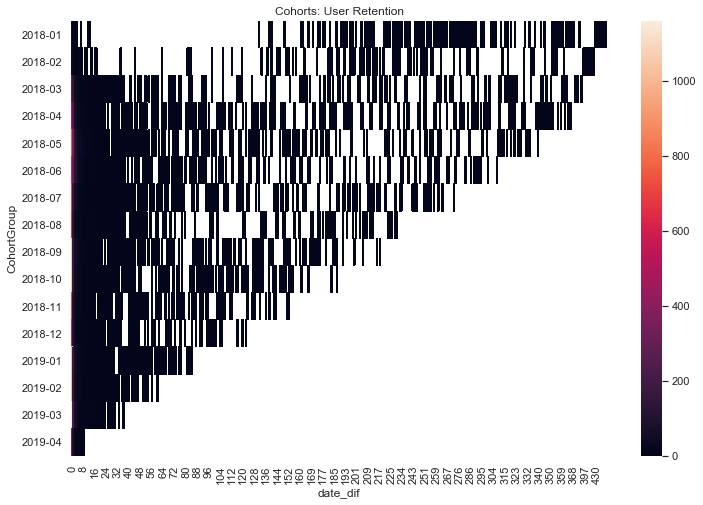

In [97]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_3.T, mask=user_retention_3.T.isnull(), annot=False);

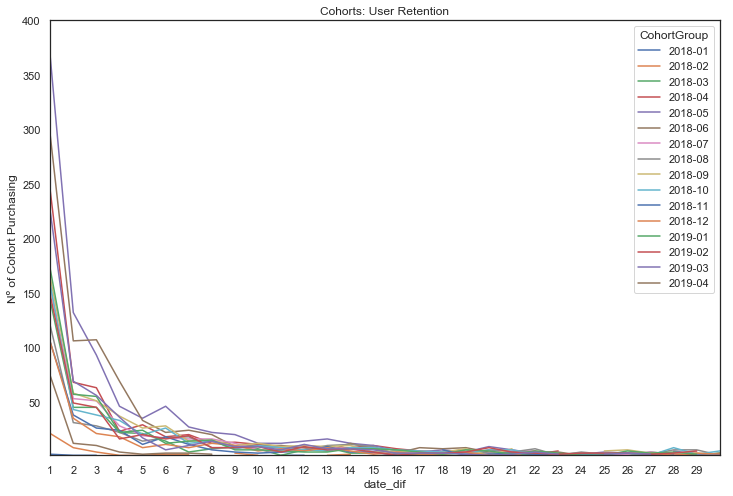

In [122]:
user_retention_3.plot(figsize=(12,8))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 30, 1))
plt.xlim(1, 30)
plt.ylim(1, 400)
plt.ylabel('Nº of Cohort Purchasing');

### Ajustar filtrando para hacer Zoom en la tabla y grafico

In [107]:
user_retention_3.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            413, 429, 430, 435, 437, 439, 441, 445, 447, 448],
           dtype='int64', name='date_dif', length=376)

In [108]:
user_retention_4 = user_retention_3.loc[user_retentio_3.index < 60]

In [112]:
user_retention_5 = user_retention_4.loc[user_retention_4.index > 1]

In [126]:
user_retention_6 = user_retention_5.loc[user_retention_5.index < 36]

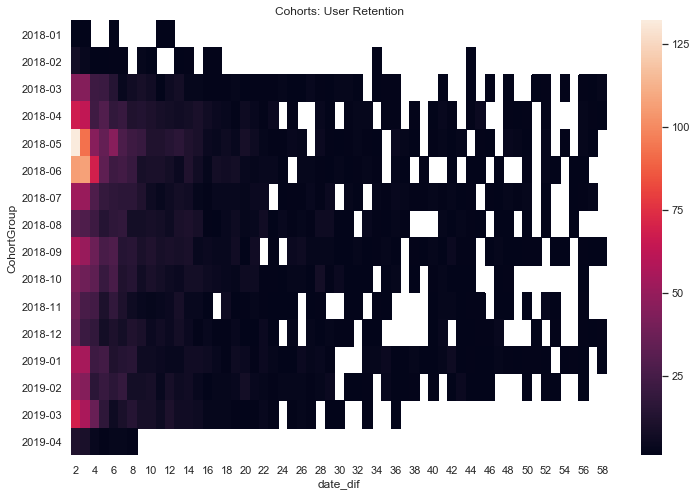

In [113]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_5.T, mask=user_retention_5.T.isnull(), annot=False);

### En el mapa de calor se ve una disminucion a partir de las 2 semanas de la alta

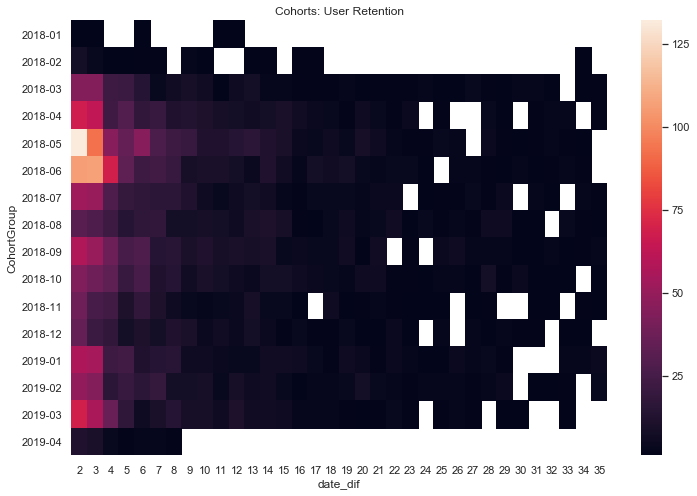

In [127]:
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_6.T, mask=user_retention_6.T.isnull(), annot=False);

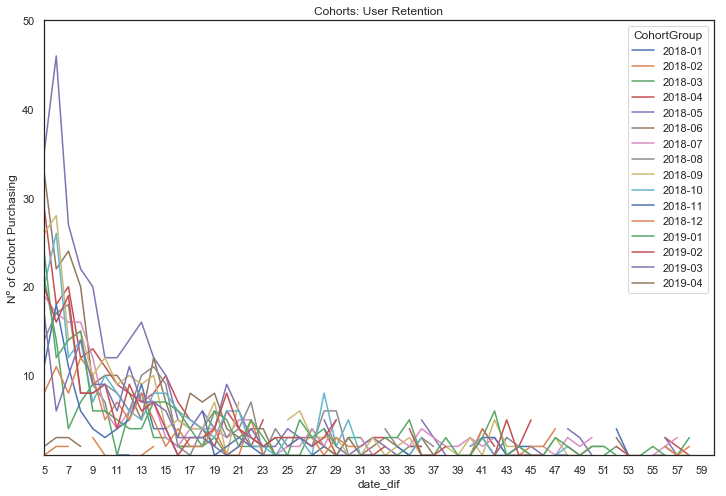

In [125]:
user_retention_5.plot(figsize=(12,8))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(5, 60, 2))
plt.xlim(5, 60)
plt.ylim(1, 50)
plt.ylabel('Nº of Cohort Purchasing');